# Gradient Boosting and GridSearch

## The Data


<img src="mushroom.jpg" width="400" height="400">

### Mushroom Hunting: Edible or Poisonous?

Data Source: https://archive.ics.uci.edu/ml/datasets/Mushroom


This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.


Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [2]:
df = pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Data Prep

In [4]:
X = df.drop('class', axis=1) 
y = df['class']

## Data Encode

In [5]:
X = pd.get_dummies(X, drop_first=True)

# Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

# Gradient Boosting and Grid Search with CV

Boosting are meta learning and technically we can pass any estimator.

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import  GridSearchCV

In [54]:
# help(GradientBoostingClassifier)

In [55]:
parameters = {
    'n_estimators':[1,5,10,20,40,100],
    'learning_rate': [0.1, 0.05, 0.2],
    'max_depth': [3, 4, 5, 6]
}

In [56]:
gb_model = GradientBoostingClassifier()

In [57]:
grid = GridSearchCV(gb_model, parameters)

### Fit to Training Data with CV Search

In [58]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [59]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

## Evaluate Performance

In [60]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [61]:
predictions = grid.predict(X_test)

In [62]:
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [63]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



### Feature Importances

In [64]:
grid.best_estimator_.feature_importances_

array([ 2.91150176e-04,  2.91619288e-16,  4.13157252e-18,  0.00000000e+00,
        9.22000429e-17,  1.04902579e-03,  0.00000000e+00,  1.27734798e-06,
        5.22110837e-18,  2.98735445e-18,  0.00000000e+00,  0.00000000e+00,
        7.44237155e-18, -7.04365379e-23,  0.00000000e+00,  1.59328629e-06,
        2.42085761e-03,  5.39314214e-02,  1.84253604e-04,  1.40596369e-02,
        1.82499853e-02,  3.31205678e-03,  6.14744334e-01,  5.61116517e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.25092906e-02,
        1.03950811e-02,  0.00000000e+00,  2.06222402e-16,  6.65977466e-18,
        1.54283253e-17,  2.87258515e-17,  0.00000000e+00,  9.40768009e-19,
        5.16495871e-18,  0.00000000e+00,  1.20673285e-17,  2.62963075e-21,
        4.39922283e-04,  1.02661579e-03,  1.35970285e-01,  3.02822984e-03,
        2.02878240e-02,  4.65375385e-04,  6.12113083e-06,  4.95063766e-06,
        0.00000000e+00,  5.38197410e-07,  4.70552759e-02,  1.12227096e-04,
        0.00000000e+00,  

In [65]:
feat_import = grid.best_estimator_.feature_importances_
feat_import

array([ 2.91150176e-04,  2.91619288e-16,  4.13157252e-18,  0.00000000e+00,
        9.22000429e-17,  1.04902579e-03,  0.00000000e+00,  1.27734798e-06,
        5.22110837e-18,  2.98735445e-18,  0.00000000e+00,  0.00000000e+00,
        7.44237155e-18, -7.04365379e-23,  0.00000000e+00,  1.59328629e-06,
        2.42085761e-03,  5.39314214e-02,  1.84253604e-04,  1.40596369e-02,
        1.82499853e-02,  3.31205678e-03,  6.14744334e-01,  5.61116517e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.25092906e-02,
        1.03950811e-02,  0.00000000e+00,  2.06222402e-16,  6.65977466e-18,
        1.54283253e-17,  2.87258515e-17,  0.00000000e+00,  9.40768009e-19,
        5.16495871e-18,  0.00000000e+00,  1.20673285e-17,  2.62963075e-21,
        4.39922283e-04,  1.02661579e-03,  1.35970285e-01,  3.02822984e-03,
        2.02878240e-02,  4.65375385e-04,  6.12113083e-06,  4.95063766e-06,
        0.00000000e+00,  5.38197410e-07,  4.70552759e-02,  1.12227096e-04,
        0.00000000e+00,  

In [66]:
imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])
imp_feats.head()

,Importance
cap-shape_c,2.911502e-04
cap-shape_f,2.916193e-16
cap-shape_k,4.131573e-18
cap-shape_s,0.000000e+00
cap-shape_x,9.220004e-17


In [67]:
imp_feats.sort_values('Importance', ascending=False)
imp_feats

,Importance
cap-shape_c,2.911502e-04
cap-shape_f,2.916193e-16
cap-shape_k,4.131573e-18
cap-shape_s,0.000000e+00
cap-shape_x,9.220004e-17
...,...
habitat_l,0.000000e+00
habitat_m,8.491585e-17
habitat_p,0.000000e+00
habitat_u,1.004851e-05


### Select only important features with > 0.000527 (as values are quite small, we want to avoid plotting every features)

In [71]:
imp_feats = imp_feats[imp_feats['Importance'] > 0.000527]
imp_feats = imp_feats.sort_values(by='Importance')

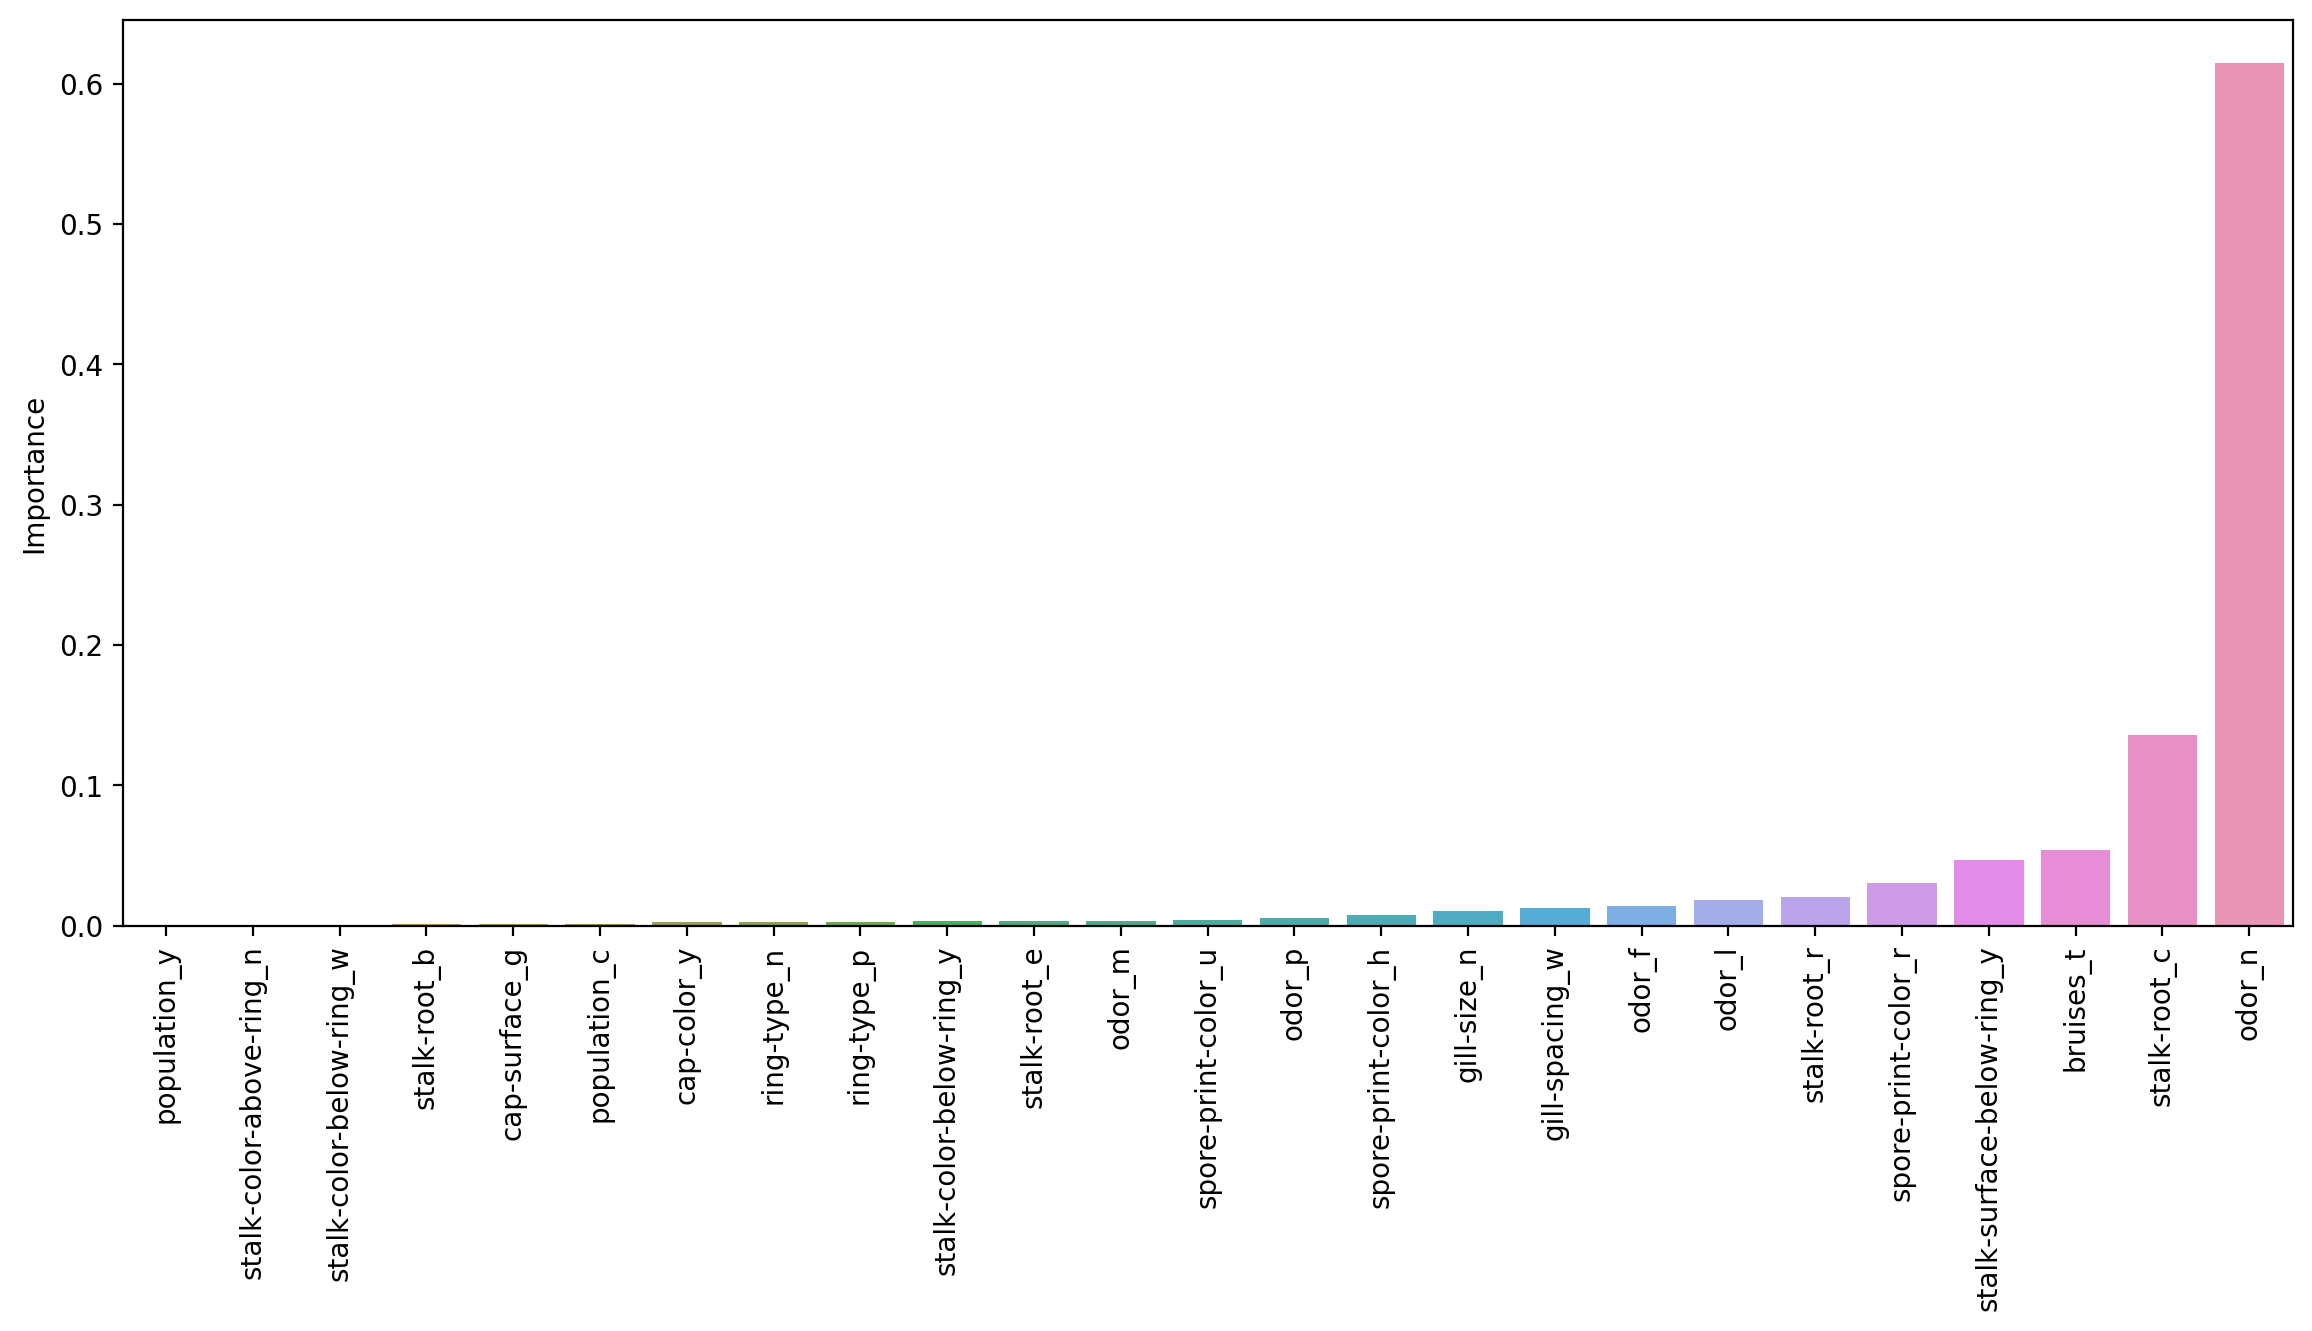

In [72]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats, x=imp_feats.index, y='Importance');
plt.xticks(rotation=90);

As we can see our new model think `odor_n` as the most important one.